# Module 2.3 — Losing Periods Inside Winning Systems

### Pre-Simulation beliefs.

1. Positive EV should dominate locally
   - If a system has an edge, the most reasonable time window should be profitable.
2. Consecutive losses indicate degradation.
   - An extended losing period feels like evidence that something has changed.
3. "Bad periods" should be rare.
   - Losing windows should be an exception, not a recurring feature.


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import sliding_window_view

In [38]:
p = 0.55
n_trades = 10_000
window_size = 20

def run_simulation(p, n_trades):
    outcomes = np.where(np.random.rand(n_trades) < p, 1, -1)
    path =  outcomes.cumsum()
    return path, outcomes

path, seq = run_simulation(p, n_trades)
window = sliding_window_view(seq, window_size)#[::window_size]   # uncomment steps for each window block operation.
window_pnl = window.sum(axis = 1)
neg_window = (window_pnl < 0).astype(int)

print(f"{neg_window.mean() * 100:.2f}% of the last {window_size}-Trade window lost money")

24.14% of the last 20-Trade window lost money


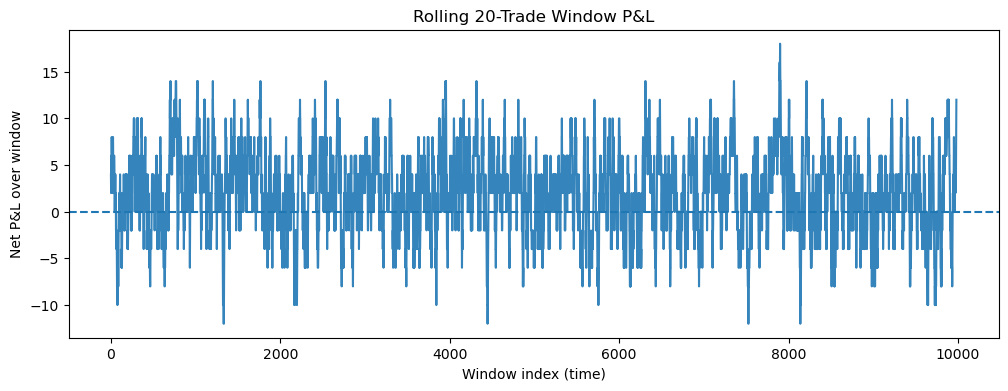

In [39]:
plt.figure(figsize=(12, 4))
plt.plot(window_pnl, alpha=0.9)
plt.axhline(0, linestyle='--')
plt.title(f'Rolling {window_size}-Trade Window P&L')
plt.xlabel('Window index (time)')
plt.ylabel('Net P&L over window')
plt.show()


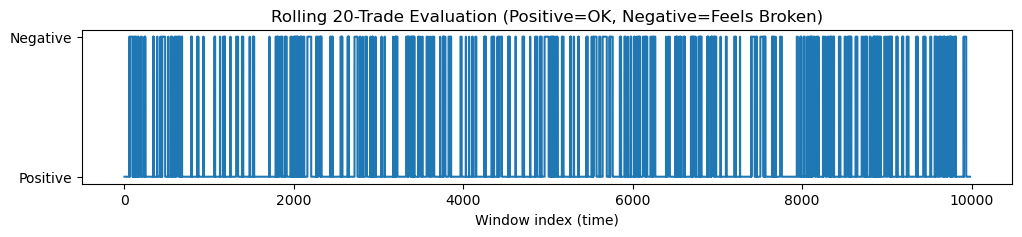

In [40]:
plt.figure(figsize=(12, 2))
plt.plot(neg_window, drawstyle='steps-post')
plt.yticks([0, 1], labels=['Positive', 'Negative'])
plt.title(f'Rolling {window_size}-Trade Evaluation (Positive=OK, Negative=Feels Broken)')
plt.xlabel('Window index (time)')
plt.show()


In [41]:
def longest_negative_window_run(seq):
    max_run = run = 0
    for x in seq:
        if x == 1:
            run += 1
            max_run = max(max_run, run)
        else:
            run = 0
    return max_run

longest_run = longest_negative_window_run(neg_window)
print(f"Longest consecutive negative-window stretch: {longest_run}")
  

Longest consecutive negative-window stretch: 49


In [42]:
for w in [20, 50, 100]:
    window = sliding_window_view(seq, w)
    pnl = window.sum(axis=1)
    neg = (pnl < 0).astype(int)
    print(
        f"{w}-trade window → "
        f"{neg.mean()*100:.1f}% negative | "
        f"Longest run: {longest_negative_window_run(neg)}"
    )

20-trade window → 24.1% negative | Longest run: 49
50-trade window → 18.9% negative | Longest run: 67
100-trade window → 15.6% negative | Longest run: 106


# Observation

### Despite positive expectancy, a significant fraction of rolling evaluation windows are net negative. These losing windows cluster in time, producing extended periods during which recent performance consistently appears broken. The length of these periods is sufficient to plausibly trigger doubt, system changes, or abandonment, even though no underlying degradation has occurred. This demonstrates that “losing periods” are not anomalies, but structurally inevitable features of positive expectancy systems when evaluated locally.